In [1]:
import numpy as np
from random import shuffle
from linreg import LinReg
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
file = pd.read_csv('dataset2.csv', header=0)

x_file = file.iloc[:, :-1]
y_file = file['y']

BOUNDARIES = [0, 128]

X_MIN = 0
X_MAX = 2 ** (int(file.shape[1]) - 1) - 1

MUT_PROB = 0.2
CROSS_TIMES = 1

In [3]:
from bitstring import BitArray

def fitness(individual):
    data = LinReg().get_columns(individual, x_file)
    result = LinReg().get_fitness(data, y_file)
    return result


def normalization(binary_number):
    # num = BitArray(bin=binary_number).int
    num = int(binary_number, 2)
    frac = num / (2 ** (len(binary_number)) - 1)
    num_norm = ((BOUNDARIES[1] - BOUNDARIES[0]) * frac) + BOUNDARIES[0]
    return num_norm


def fitness_sine(individual):
    return math.sin(normalization(individual))

In [4]:
def pop_gen(n_bits, n_pop, fitness_function=fitness_sine):
    res = list()
    for _ in range(n_pop):
        string = ''.join([str(i) for i in np.random.randint(0, 2, n_bits)])
        # tuple = [string, fitness_function(string)]
        res.append((string, fitness_function(string)))
    return res

    #if we want it to be strings
    # return [''.join([str(i) for i in np.random.randint(0, 2, n_bits)]) for _ in range(n_pop)]

    #if we want it to be list of numbers
    # return [np.random.randint(0, 2, n_bits).tolist() for _ in range(n_pop)]
    # population = []
    # for _ in range(n_pop):
    #     ind = np.random.randint(0, 2, n_bits).tolist()
    #     fit = fitness_function(ind)
    #     population.append((ind, fit))
    # return population

In [5]:
import statistics

def median_fitness(population):
    return statistics.median([el[1] for el in population])

# another ways for parent selection - round with probabilities (roulette wheel selection) is below

def parent_selection(population, sign):
    selected = list()
    for tup in population:
        ind, fit = tup[0], tup[1]
        if fit >= median_fitness(population) and sign == '>':
            selected.append(tup)
        if fit <= median_fitness(population) and sign == '<':
            selected.append(tup)
    selected1 = selected
    shuffle(selected)
    res = selected + selected1
    shuffle(res)
    return res


In [6]:
from copy import deepcopy
def mutation(mut_prob, bitstring):
    for i in range(len(bitstring)):
        # check for a mutation
        if np.random.rand() < mut_prob:
            # flip the bit
            if bitstring[i] == '0':
                bitstring = bitstring[:i] + '1' + bitstring[i + 1:]
            if bitstring[i] == '1':
                bitstring = bitstring[:i] + '0' + bitstring[i + 1:]
    return bitstring



def crossover(p1, p2, r_cross):
    pt = np.random.randint(1, len(p1[0])-2)
        # perform crossover
    c1 = p1[0][:pt] + p2[0][pt:]
    c2 = p2[0][:pt] + p1[0][pt:]
    return [c1, c2]

In [7]:
def offspring_pop(parents, fitness_function):
    n = len(parents)
    children = list()
    for i in range(0, n, 2):
        # get selected parents in pairs
        p1, p2 = parents[i], parents[i + 1]
        # crossover and mutation
        for c in crossover(p1, p2, CROSS_TIMES):
            # mutation
            mutation(MUT_PROB, c)
            # store for next generation
            children.append((c, fitness_function(c)))
    return children

In [8]:
def best_fitness(population, n_high, bool):
    pop2 = population
    pop2.sort(key=lambda x: x[1], reverse=bool)
    return [[normalization(tup[0]), tup[1]]for tup in pop2[-n_high:]]

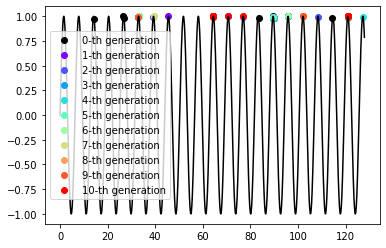

In [18]:
NUM_GENERATIONS = 10
SIGN = '>'
# ax = fig.add_axes([0,0,1,1])
x = np.arange(0, 128,0.1)# start,stop,step
y = np.sin(x)
plt.plot(x, y, color='black')
pop = pop_gen(10, 100)
pair = best_fitness(pop, 10, False)
x = [i[0] for i in pair]
y = [i[1] for i in pair]
plt.scatter(x, y, color='black', label = f'0-th generation')
# print(median_fitness(pop))

colors = cm.rainbow(np.linspace(0, 1, NUM_GENERATIONS))
for i, c in zip(range(NUM_GENERATIONS), colors):
    pop_selected = parent_selection(pop, SIGN)
    pop = offspring_pop(pop_selected, SIGN)
    pair = best_fitness(pop, 10, False)
    x = [i[0] for i in pair]
    y = [i[1] for i in pair]
    plt.scatter(x, y, color=c, label = f'{i + 1}-th generation')
plt.legend()
plt.show()

In [9]:
def fitness_updated(ind):
    ind2 = normalization(ind)
    if 5 <= ind2 <= 10:
        return fitness_sine(ind)
    elif 5 > ind2:
        return fitness_sine(ind) * 0.7
    elif 10 < ind2 < 15:
        return fitness_sine(ind) * 0.7
    elif 15 < ind2 < 25:
        return fitness_sine(ind) / 2
    return 0

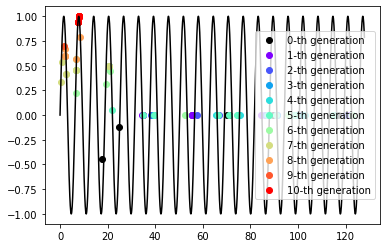

In [81]:
NUM_GENERATIONS = 10

x = np.arange(0, 128,0.1)# start,stop,step
y = np.sin(x)
plt.plot(x, y, color='black')
pop = pop_gen(10, 10, fitness_updated)
pair = best_fitness(pop, 10, False)
x = [i[0] for i in pair]
y = [i[1] for i in pair]
plt.scatter(x, y, color='black', label = f'0-th generation')


colors = cm.rainbow(np.linspace(0, 1, NUM_GENERATIONS))
for i, c in zip(range(NUM_GENERATIONS), colors):
    pop_selected = parent_selection(pop, '>')
    pop = offspring_pop(pop_selected, fitness_updated)
    pair = best_fitness(pop, 10, False)
    x = [i[0] for i in pair]
    y = [i[1] for i in pair]
    plt.subplot(111)
    plt.scatter(x, y, color=c, label = f'{i+1}-th generation')


plt.legend()
plt.show()

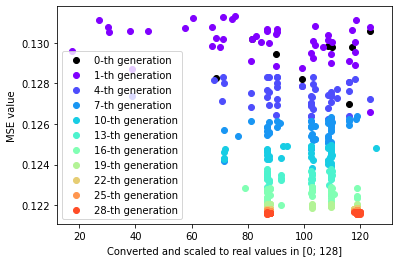

In [11]:
NUM_GENERATIONS = 30

import matplotlib.pyplot as plt
import matplotlib.cm as cm

pop = pop_gen(100, 100, fitness)
pop_best = best_fitness(pop, 10, True)
x = [i[0] for i in pop_best]
y = [i[1] for i in pop_best]
plt.scatter(x, y, color='black', label = '0-th generation')
# print(f'For the 0-th generation the best mse is {y[9]}')
# print(median_fitness(pop))

colors = cm.rainbow(np.linspace(0, 1, NUM_GENERATIONS+1))
for i, c in zip(range(NUM_GENERATIONS), colors):
    pop_selected = parent_selection(pop, '<')
    pop = offspring_pop(pop_selected, fitness)
    if i % 3 == 0:
        pop_best = best_fitness(pop, 50, True)
        x = [i[0] for i in pop_best]
        y = [i[1] for i in pop_best]
        # print(f'For the {i+1}-th generation the best mse is {y[9]}')
        plt.scatter(x, y, color=c, label = f'{i + 1}-th generation')
plt.legend()
plt.xlabel("Converted and scaled to real values in [0; 128]")
plt.ylabel("MSE value")
plt.show()

In [12]:
def crowding(p1, p2, c, sign):
    counter_1 = 0
    counter_2 = 0
    for i, el in enumerate(p1):
        if el == c[i]:
            counter_1 += 1
        if p2[i] == c[i]:
            counter_2 += 1
    if counter_1 > counter_2 and sign == '>':
        if fitness(c) > fitness(p1):
            return c
        return p1
    if counter_1 > counter_2 and sign == '<':
        if fitness(c) < fitness(p1):
            return c
        return p1
    else:
        if fitness(c) > fitness(p2) and sign == '>':
            return c
        if fitness(c) < fitness(p2) and sign == '<':
            return c
        return p2


def offspring_pop_c(parents, fitness_function, sign):
    n = len(parents)
    # couples = [(parents[i], parents[n - i - 1]) for i in range(int(n / 2))]
    children = list()
    for i in range(0, n, 2):
        # get selected parents in pairs
        p1, p2 = parents[i], parents[i + 1]
        # crossover and mutation
        for c in crossover(p1, p2, CROSS_TIMES):
            # mutation
            mutation(MUT_PROB, c)
            # store for next generation

            children.append((crowding(p1[0], p2[0], c, sign), fitness_function(c)))
    return children

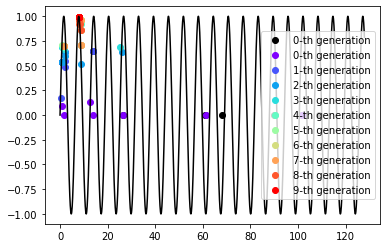

In [38]:
NUM_GENERATIONS = 10

import matplotlib.pyplot as plt
import matplotlib.cm as cm
width = 0.25
x = np.arange(0, 128,0.1)# start,stop,step
y = np.sin(x)
plt.plot(x, y, color='black')
pop = pop_gen(10, 10, fitness_updated)
pair = best_fitness(pop, 10, False)
x = [i[0] for i in pair]
y = [i[1] for i in pair]
plt.scatter(x, y, color='black', label = f'0-th generation')

colors = cm.rainbow(np.linspace(0, 1, NUM_GENERATIONS))
for i, c in zip(range(NUM_GENERATIONS), colors):
    pop_selected = parent_selection(pop, '>')
    pop = offspring_pop_c(pop_selected, fitness_updated, '>')
    pair = best_fitness(pop, 10, False)
    x = [i[0] for i in pair]
    y = [i[1] for i in pair]
    plt.subplot(111)
    plt.scatter(x, y, color=c, label = f'{i}-th generation')


plt.legend()
plt.show()

In [13]:
import math

def entropy_calc(population):
    p = [list(tup[0]) for tup in population]
    p = np.asarray(p).transpose()
    # list_of_probs = [0 for i in range(len(population))]
    summ = 0
    for ind in range(len(p)):
        counter = np.count_nonzero(p[ind] == '1')
        if counter != 0:
            summ += counter * math.log(counter, 2)
    return - summ


For the 0-th generation the best mse is 0.13248848496404866
For the 1-th generation the best mse is 0.13081497624777755
For the 2-th generation the best mse is 0.1306778109478942
For the 3-th generation the best mse is 0.13011780795574202
For the 4-th generation the best mse is 0.13033390998424368
For the 5-th generation the best mse is 0.13013068609723882
For the 6-th generation the best mse is 0.1299024472780186
For the 7-th generation the best mse is 0.12977435262346082
For the 8-th generation the best mse is 0.12960577324513078
For the 9-th generation the best mse is 0.12955568914102344
For the 10-th generation the best mse is 0.12940467539747447


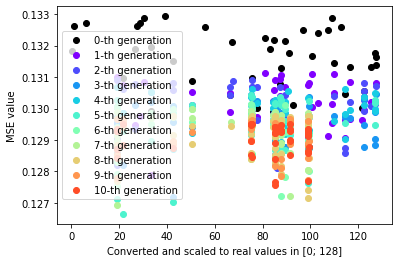

In [47]:
NUM_GENERATIONS = 10

pop = pop_gen(100, 100, fitness)
pop_best = best_fitness(pop, 50, True)
x = [i[0] for i in pop_best]
y = [i[1] for i in pop_best]
plt.scatter(x, y, color='black', label = '0-th generation')
print(f'For the 0-th generation the best mse is {y[9]}')

colors = cm.rainbow(np.linspace(0, 1, NUM_GENERATIONS+1))
for i, c in zip(range(NUM_GENERATIONS), colors):
    pop_selected = parent_selection(pop, '<')
    pop = offspring_pop_c(pop_selected, fitness, '<')
    if i % (NUM_GENERATIONS // 10) == 0:
        pop_best = best_fitness(pop, 50, True)
        x = [i[0] for i in pop_best]
        y = [i[1] for i in pop_best]
        print(f'For the {i+1}-th generation the best mse is {y[9]}')
        plt.scatter(x, y, color=c, label = f'{i + 1}-th generation')
plt.legend()
plt.xlabel("Converted and scaled to real values in [0; 128]")
plt.ylabel("MSE value")
plt.show()

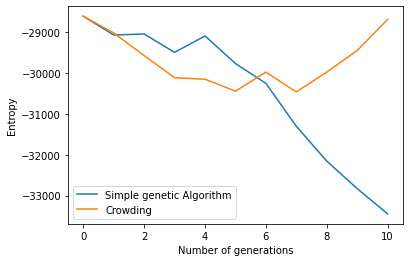

In [60]:
NUM_GENERATIONS = 10

pop = pop_gen(100, 100, fitness)
pop2 = pop
entropy_simple = []
entropy_crowding = []
a = entropy_calc(pop)
entropy_simple.append(a)
entropy_crowding.append(a)
# print(f'For the 0-th generation entropy is {a}')

for i in range(NUM_GENERATIONS):
    pop_selected_n = parent_selection(pop, '<')
    pop = offspring_pop(pop_selected_n, fitness)
    a = entropy_calc(pop)
    # print(f'For the {i + 1}-th generation simple entropy is {a}')
    entropy_simple.append(a)

    pop_selected_c = parent_selection(pop2, '<')
    pop2 = offspring_pop_c(pop_selected_c, fitness, '<')
    b = entropy_calc(pop2)
    # print(f'For the {i + 1}-th generation crowding entropy is {b}')
    entropy_crowding.append(b)

plt.plot(range(NUM_GENERATIONS + 1), entropy_simple, label = 'Simple genetic Algorithm')
plt.plot(range(NUM_GENERATIONS + 1), entropy_crowding, label = "Crowding")
plt.legend()
plt.xlabel("Number of generations")
plt.ylabel("Entropy")
plt.show()

In [14]:
def roulette_wheel_selection(population, sign):
    # Computes the totality of the population fitness
    # it works as since we divide by 1, the proportion is the same -> 1/8 < 1/5, though 5 < 8
    # the same will work with 0.132 > 0.120 , 1/ 0.132 < 1 / 0.120
    # hence it will be a maximization problem for inverted values.
    if sign == '<':
        population_fitness = sum([1/chromosome[1] for chromosome in population])

        # Computes for each chromosome the probability
        chromosome_probabilities = [(1 / (chromosome[1]))/population_fitness for chromosome in population]
    elif sign == '>':
        population_fitness = sum([chromosome[1] for chromosome in population])
        chromosome_probabilities = [chromosome[1]/population_fitness for chromosome in population]
    else:
        print('If you want a maximazing funtion, enter > as a parameter, otherwise <')
    # Selects one chromosome based on the computed probabilities
    r = []
    indexes = [i for i in range(len(population))]
    for _ in range(len(population)):
        chosen = np.random.choice(indexes, p=chromosome_probabilities)
        r.append(population[chosen])
    return r

#### Simple genetic algorithm with wheel roulette parent selection

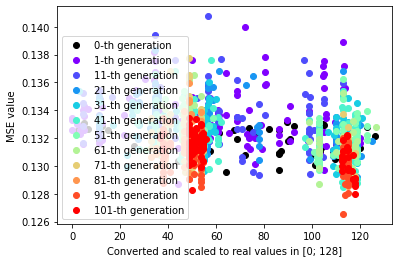

In [90]:
NUM_GENERATIONS = 100

pop = pop_gen(100, 100, fitness)
pop_best = best_fitness(pop, 50, True)
x = [i[0] for i in pop_best]
y = [i[1] for i in pop_best]
plt.scatter(x, y, color='black', label = '0-th generation')
# print(f'For the 0-th generation the best mse is {y[9]}')

colors = cm.rainbow(np.linspace(0, 1, NUM_GENERATIONS+1))
for i, c in zip(range(NUM_GENERATIONS + 1), colors):
    pop_selected = roulette_wheel_selection(pop, '<')
    pop = offspring_pop(pop_selected, fitness)
    if i % (NUM_GENERATIONS // 10) == 0:
        pop_best = best_fitness(pop, 100, True)
        x = [i[0] for i in pop_best]
        y = [i[1] for i in pop_best]
        # print(f'For the {i+1}-th generation the best mse is {y[9]}')
        plt.scatter(x, y, color=c, label=f'{i + 1}-th generation')

plt.legend()
plt.xlabel("Converted and scaled to real values in [0; 128]")
plt.ylabel("MSE value")
plt.show()

#### Crowding genetic algorithm with wheel roulette parent selection

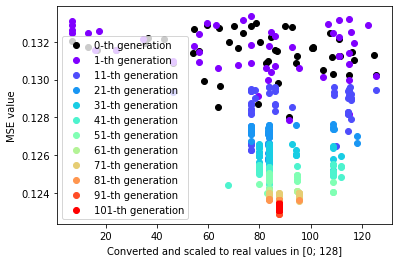

In [86]:
NUM_GENERATIONS = 100

pop = pop_gen(100, 100, fitness)
pop_best = best_fitness(pop, 50, True)
x = [i[0] for i in pop_best]
y = [i[1] for i in pop_best]
plt.scatter(x, y, color='black', label = '0-th generation')
# print(f'For the 0-th generation the best mse is {y[9]}')

colors = cm.rainbow(np.linspace(0, 1, NUM_GENERATIONS+1))
for i, c in zip(range(NUM_GENERATIONS + 1), colors):
    pop_selected = roulette_wheel_selection(pop, '<')
    pop = offspring_pop_c(pop_selected, fitness, '<')
    if i % (NUM_GENERATIONS // 10) == 0:
        pop_best = best_fitness(pop, 50, True)
        x = [i[0] for i in pop_best]
        y = [i[1] for i in pop_best]
        # print(f'For the {i+1}-th generation the best mse is {y[9]}')
        plt.scatter(x, y, color=c, label=f'{i + 1}-th generation')

plt.legend()
plt.xlabel("Converted and scaled to real values in [0; 128]")
plt.ylabel("MSE value")
plt.show()

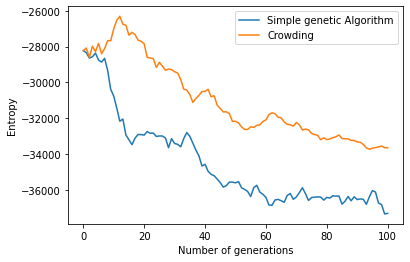

In [15]:
NUM_GENERATIONS = 100

pop = pop_gen(100, 100, fitness)
pop2 = pop
entropy_simple = []
entropy_crowding = []
a = entropy_calc(pop)
entropy_simple.append(a)
entropy_crowding.append(a)
# print(f'For the 0-th generation entropy is {a}')

for i in range(NUM_GENERATIONS):
    pop_selected_n = roulette_wheel_selection(pop, '<')
    pop = offspring_pop(pop_selected_n, fitness)
    a = entropy_calc(pop)
    # print(f'For the {i + 1}-th generation simple entropy is {a}')
    entropy_simple.append(a)

    pop_selected_c = roulette_wheel_selection(pop2, '<')
    pop2 = offspring_pop_c(pop_selected_c, fitness, '<')
    b = entropy_calc(pop2)
    # print(f'For the {i + 1}-th generation crowding entropy is {b}')
    entropy_crowding.append(b)

plt.plot(range(NUM_GENERATIONS + 1), entropy_simple, label = 'Simple genetic Algorithm')
plt.plot(range(NUM_GENERATIONS + 1), entropy_crowding, label = "Crowding")
plt.legend()
plt.xlabel("Number of generations")
plt.ylabel("Entropy")
plt.show()

/var/folders/m9/1tg24k8x64ddswz9jf6yfls80000gn/T/ipykernel_766/3099134612.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


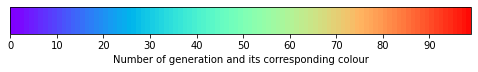

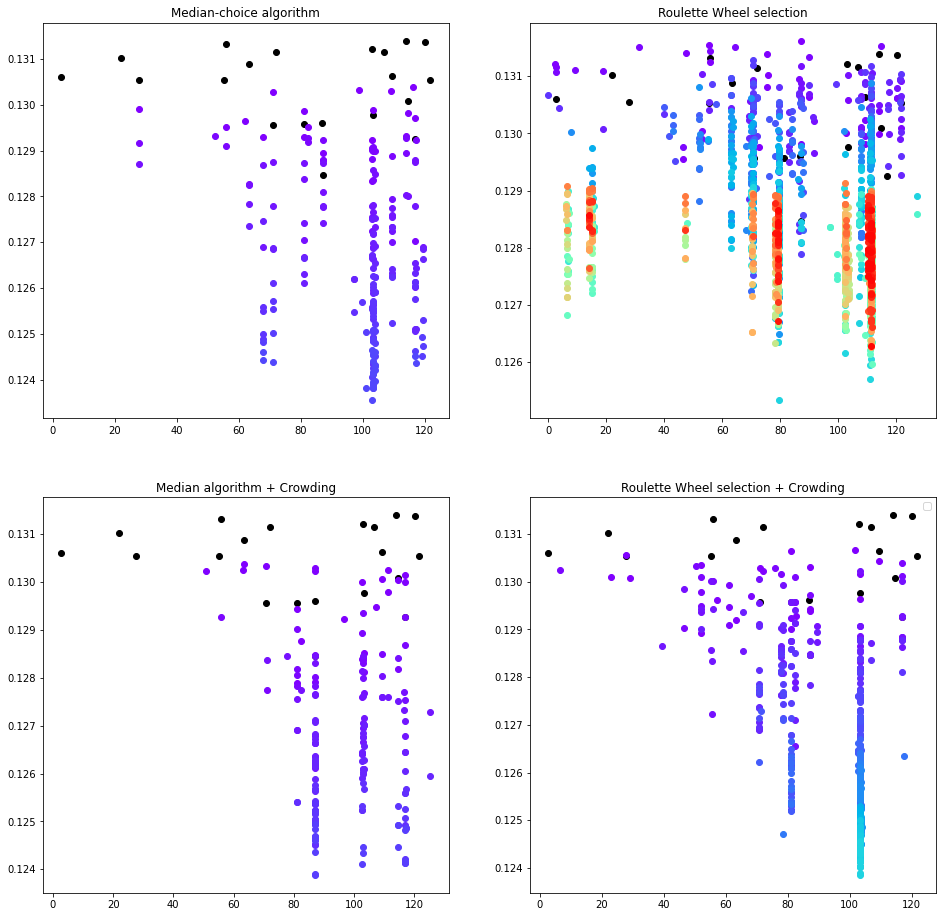

In [60]:
import matplotlib as mpl
NUM_GENERATIONS = 100
IND = 20

fig, ax = plt.subplots(figsize=(16, 0.5))
fig.subplots_adjust(left = 0.5)
norm = mpl.colors.Normalize(vmin=1, vmax=NUM_GENERATIONS)
cb1 = mpl.colorbar.ColorbarBase(ax, cmap='rainbow',
                                norm= norm,
                                orientation='horizontal',
                                boundaries=[i for i in range(100) if i <= NUM_GENERATIONS + 1])
cb1.set_label('Number of generation and its corresponding colour')
fig.show()


plt.rcParams['figure.figsize'] = [16, 16]
pop = pop_gen(100, 100, fitness)
pop2 = deepcopy(pop)
pop3 = deepcopy(pop)
pop4 = deepcopy(pop)
pop_best = best_fitness(pop, IND, True)
x = [i[0] for i in pop_best]
y = [i[1] for i in pop_best]
# plt.scatter(x, y, color='black', label = '0-th generation')
# print(f'For the 0-th generation the best mse is {y[9]}')
figure, axis = plt.subplots(2, 2)
axis[0, 0].scatter(x, y, color='black')
axis[0, 1].scatter(x, y, color='black')
axis[1, 0].scatter(x, y, color='black')
axis[1, 1].scatter(x, y, color='black')

mse1 = []
mse2 = []
mse3 = []
mse4 = []
needed_mse = 0.124
mse_s = [1 for i in range(4)]


colors = cm.rainbow(np.linspace(0, 1, NUM_GENERATIONS+1))
for i, c in zip(range(NUM_GENERATIONS), colors):
    # plt.axes(facecolor=c)
    if mse_s[0] > needed_mse:
        pop_selected = parent_selection(pop, '<')
        pop = offspring_pop(pop_selected, fitness)
        axis[0, 0].set_title("Median-choice algorithm")
        pop_best = best_fitness(pop, IND, True)
        x = [i[0] for i in pop_best]
        y = [i[1] for i in pop_best]
        mse_s[0] = pop_best[IND - 2][1]
        mse1.append(pop_best[IND - 2][1])
        # print(f'For the {i+1}-th generation the best mse is {y[9]}')
        axis[0, 0].scatter(x, y, color=c)
        # plt.scatter(x, y, color=c, label=f'{i + 1}-th generation')

    if mse_s[1] > needed_mse:
        pop_selected2 = roulette_wheel_selection(pop2, '<')
        pop2 = offspring_pop(pop_selected2, fitness)
        axis[0, 1].set_title("Roulette Wheel selection")
        pop_best2 = best_fitness(pop2, IND, True)
        x = [i[0] for i in pop_best2]
        y = [i[1] for i in pop_best2]
        mse_s[1] = pop_best2[IND - 2][1]
        mse2.append(pop_best2[IND - 2][1])
        # print(f'For the {i+1}-th generation the best mse is {y[9]}')
        axis[0, 1].scatter(x, y, color=c)

    if mse_s[2] > needed_mse:
        pop_selected3 = parent_selection(pop3, '<')
        pop3 = offspring_pop_c(pop_selected3, fitness, '<')
        axis[1, 0].set_title("Median algorithm + Crowding")
        pop_best3 = best_fitness(pop3, IND, True)
        x = [i[0] for i in pop_best3]
        y = [i[1] for i in pop_best3]
        mse_s[2] = pop_best3[IND - 2][1]
        mse3.append(pop_best3[IND - 2][1])
        # print(f'For the {i+1}-th generation the best mse is {y[9]}')
        axis[1, 0].scatter(x, y, color=c)

    if mse_s[3] > needed_mse:
        pop_selected4 = roulette_wheel_selection(pop4, '<')
        pop4 = offspring_pop_c(pop_selected4, fitness, '<')
        axis[1, 1].set_title("Roulette Wheel selection + Crowding")
        pop_best4 = best_fitness(pop4, IND, True)
        x = [i[0] for i in pop_best4]
        y = [i[1] for i in pop_best4]
        mse_s[3] = pop_best4[IND - 2][1]
        mse4.append(pop_best4[IND - 2][1])
        # print(f'For the {i+1}-th generation the best mse is {y[9]}')
        axis[1, 1].scatter(x, y, color=c)



# plt.legend()
# plt.xlabel("Converted and scaled to real values in [0; 128]")
# plt.ylabel("MSE value")
plt.show()

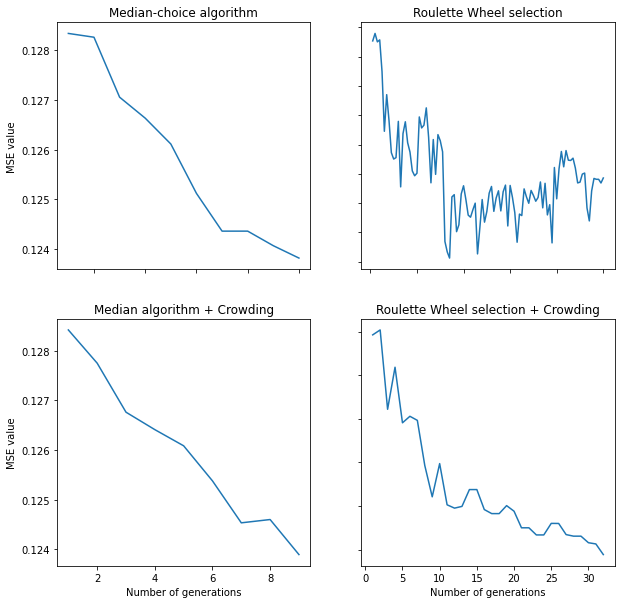

In [73]:
plt.rcParams['figure.figsize'] = [10, 10]
figure, axis = plt.subplots(2, 2)
axis[0, 0].set_title("Median-choice algorithm")
axis[0, 0].plot([i + 1 for i in range(len(mse1))], mse1)
axis[0, 1].set_title("Roulette Wheel selection")
axis[0, 1].plot([i + 1 for i in range(len(mse2))], mse2)
axis[1, 0].set_title("Median algorithm + Crowding")
axis[1, 0].plot([i + 1 for i in range(len(mse3))], mse3)
axis[1, 1].set_title("Roulette Wheel selection + Crowding")
axis[1, 1].plot([i + 1 for i in range(len(mse4))], mse4)

for ax in axis.flat:
    ax.set(xlabel='Number of generations', ylabel='MSE value')
    ax.label_outer()
plt.show()

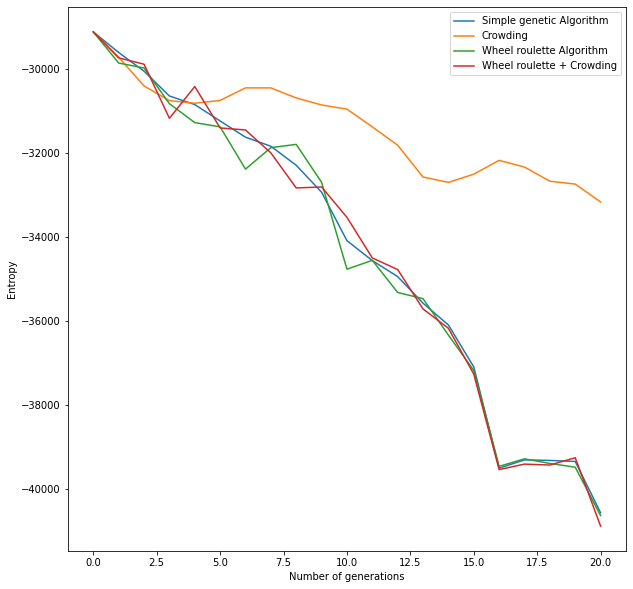

In [78]:
NUM_GENERATIONS = 20

pop = pop_gen(100, 100, fitness)
pop2 = pop
pop3 = pop
pop4 = pop

entropy_simple = []
entropy_crowding = []
entropy_wheel = []
entropy_wheel_crowding = []

a = entropy_calc(pop)
entropy_simple.append(a)
entropy_wheel.append(a)
entropy_wheel_crowding.append(a)
entropy_crowding.append(a)
# print(f'For the 0-th generation entropy is {a}')

for i in range(NUM_GENERATIONS):
    pop_selected_n = parent_selection(pop, '<')
    pop = offspring_pop(pop_selected_n, fitness)
    a = entropy_calc(pop)
    # print(f'For the {i + 1}-th generation simple entropy is {a}')
    entropy_simple.append(a)

    pop_selected_c = parent_selection(pop2, '<')
    pop2 = offspring_pop_c(pop_selected_c, fitness, '<')
    b = entropy_calc(pop2)
    # print(f'For the {i + 1}-th generation crowding entropy is {b}')
    entropy_crowding.append(b)

    pop_selected_n = roulette_wheel_selection(pop, '<')
    pop3 = offspring_pop(pop_selected_n, fitness)
    c = entropy_calc(pop3)
    # print(f'For the {i + 1}-th generation simple entropy is {a}')
    entropy_wheel.append(c)

    pop_selected_n = roulette_wheel_selection(pop, '<')
    pop4 = offspring_pop(pop_selected_n, fitness)
    d = entropy_calc(pop4)
    # print(f'For the {i + 1}-th generation simple entropy is {a}')
    entropy_wheel_crowding.append(d)

plt.plot(range(NUM_GENERATIONS + 1), entropy_simple, label = 'Simple genetic Algorithm')
plt.plot(range(NUM_GENERATIONS + 1), entropy_crowding, label = "Crowding")
plt.plot(range(NUM_GENERATIONS + 1), entropy_wheel, label = 'Wheel roulette Algorithm')
plt.plot(range(NUM_GENERATIONS + 1), entropy_wheel_crowding, label = "Wheel roulette + Crowding")
plt.legend()
plt.xlabel("Number of generations")
plt.ylabel("Entropy")
plt.show()